Todos los puntos convergieron en 46 iteraciones


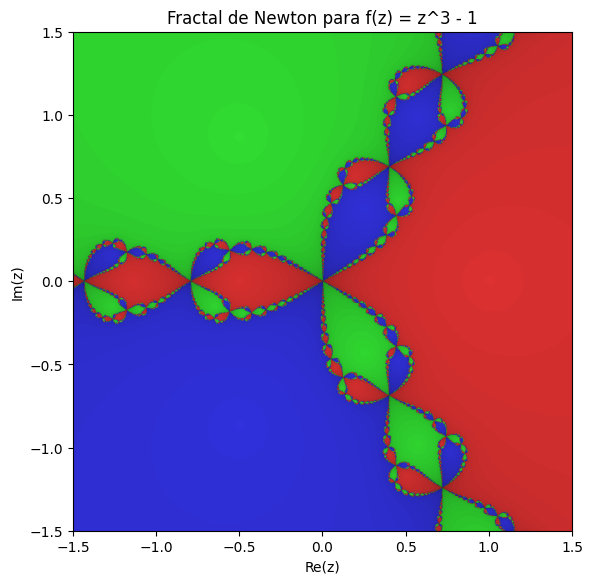

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SERIAL CON VECTORIZACION

# definicion de la funcion
def f(z):
    return z**3 - 1.0

# derivada de la funcion
def df(z):
    return 3.0 * z**2

# raices conocidas de la funcion
roots = np.array([
    1.0 + 0j,
    -0.5 + np.sqrt(3)/2 * 1j,
    -0.5 - np.sqrt(3)/2 * 1j
])

# parametros del plano complejo y de la iteracion
width, height = 800, 800 # resolucion de la imagen, puntos de inicio que se prueban en el plano complejo

# marco del plano que se va visualizar
xmin, xmax = -1.5, 1.5 # eje x
ymin, ymax = -1.5, 1.5 # eje y

max_iter = 50 # maximo de iteraciones metodo
tol = 1e-6  # tolerancia, si el punto z esta a menos de 1e-6 unidades de una raiz conocida, converge

# arrays que contienen los valores de coordenadas reales e imaginarias
x = np.linspace(xmin, xmax, width) # 800 puntos
y = np.linspace(ymin, ymax, height) # 800 puntos

X, Y = np.meshgrid(x, y) # todas las combinaciones de x e y, 800x800
Z = X + 1j * Y # array Z, representa plano complejo, cada elemento es un numero complejo
               # que es el punto de inicio del metodo de newton para ese pixel
               # 1j es la parte imaginaria, estoy sumando las matrices elemento por elemento

# estructuras para el seguimiento de la iteracion
conv_idx = np.full(Z.shape, -1, dtype=int)   # guarda el indice de la raiz a la que converge cada pixel, info color
iters = np.zeros(Z.shape, dtype=int)         # contador de iteraciones, info brillo
active = np.ones(Z.shape, dtype=bool)        # indica si el punto aun esta iterando

# metodo de newton
# se ejecuta cantidad de max_iter o hasta que todos los pixeles converjan
for k in range(max_iter):
    zk = Z[active] # selecciona los valores de z que no convergieron
    denom = df(zk) # calcula la derivada de f

    # evita dividir por cero, derivadas muy pequeñas
    mask = np.abs(denom) > 1e-14 # solo los puntos donde la derivada no es cero o casi cero se calculan
    zk_new = np.empty_like(zk)
    zk_new[mask] = zk[mask] - f(zk[mask]) / denom[mask]
    zk_new[~mask] = zk[~mask]  # si derivada es casi cero, no actualiza el punto, diverge o se bloquea

    Z[active] = zk_new # actualiza los puntos activos en el array Z con los valores iterados
    iters[active] += 1 # incrementa contador de iteraciones para pixeles activos

    # comprobar convergencia a alguna raiz conocida
    dists = np.stack([np.abs(Z - r) for r in roots], axis=-1) # calcula la distancia de cada punto actual a cada raiz conocida
    min_dist = dists.min(axis=-1) # encuentra la minima distancia entre el punto Z y cualquiera de las raices
    reached = (min_dist < tol) & active # marca los pixeles que estan cerca de alguna raiz y aun activos, no convergieron

    # si hay pixeles que convergieron
    # asigna el indice de la raiz alcanzada
    if np.any(reached):
        root_idx = dists[reached].argmin(axis=-1) # encuentra el indice de la raiz mas cercana para los pixeles que convergieron
        conv_idx[reached] = root_idx # guaraa el indice en el array

    # desactiva los pixeles que ya convergieron
    active[reached] = False

    # early stop si ningun pixel esta activo; todos convergieron o se bloquearon
    if not np.any(active):
        print(f"Todos los puntos convergieron en {k} iteraciones")
        break

# coloreado: tono por raiz, brillo por iteraciones
# 3 colores base para las 3 raíces
colors = np.zeros((height, width, 3), dtype=float)
palette = np.array([
    [0.9, 0.2, 0.2],  # rojo
    [0.2, 0.9, 0.2],  # verde
    [0.2, 0.2, 0.9],  # azul
])

mask_conv = conv_idx >= 0
colors[mask_conv] = palette[conv_idx[mask_conv]]

# brillo decrece con mas iteraciones, mas lento, mas iter = mas oscuro, mas rapido, menor iter = mas brillante
brightness = 1.0 - (iters / max_iter) * 0.8
for c in range(3):
    colors[..., c] = colors[..., c] * brightness

# pixeles no convergentes en negro
colors[~mask_conv] = 0.0

# grafico
plt.figure(figsize=(6,6))
plt.imshow(colors, extent=[xmin, xmax, ymin, ymax], origin='lower')
plt.title('Fractal de Newton para f(z) = z^3 - 1')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.tight_layout()
plt.show()


# toma todo el array z con los puntos activos
# aplica la formula del metodo de newton
# si el punto converge a una raiz, lo desactiva
# si no converge, aumenta la iteracion
# y vuelve a aplicar la formula de newton a los puntos activos
# asi hasta que converjan todos
# o hasta llegar al max de iteraciones

In [ ]:
# SERIAL SIN VECTORIZACION

In [ ]:
# PARALELO

